In [102]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### We downloaded an excell file contains benjamin netanyahu speeches and content from ynet source:
https://z.ynet.co.il/long/content/specials/inhiswords/
### After that, we converted it to a .csv file in order to work with the pandas library

In [103]:
# xlsx to csv conversion 
# def convert_xlsx_to_csv(xlsx_file, csv_file):
#     df = pd.read_excel(xlsx_file)
#     df.to_csv(csv_file, index=False)

# convert_xlsx_to_csv('netanyahu___data.xlsx', 'bibi_data.csv')

In [104]:
bibi_df = pd.read_csv('bibi_data.csv')
bibi_df.head()

,תאריך,סוג,טקסט
0,7.10.2023,הצהרה,"אזרחי ישראל, אנחנו במלחמה. לא במבצע, לא בסבבים..."
1,7.10.2023,פתיחת ישיבת קבינט,מהבוקר מדינת ישראל נמצאת במלחמה. היעד הראשון ש...
2,2023-07-10 00:00:00,ישיבת קבינט והצהרה לציבור,"התקבלו החלטות מבצעיות שמטרתן להביא ל""השמדת היכ..."
3,2023-08-10 00:00:00,ציוץ,"""אנחנו יוצאים למלחמה ארוכה וקשה. המלחמה נכפתה ..."
4,8.10.2023,ציוץ,"""בחמ״ל חיל האוויר. ישראל תנצח""."


In [105]:
# replace column titles with english names
bibi_df.columns = ['date','type','text']

### We have extracted every הצהרה and נאום from the types provided

In [106]:
# filter to keep only the rows with 'נאום' contained in the type column
filtered_bibi_df = bibi_df[(bibi_df['type'].str.contains('נאום', case=False, na=False) 
                           | bibi_df['type'].str.contains('הצהרה', case=False, na=False)
                           ) & ~bibi_df['type'].str.contains('ציוץ', case=False, na=False)]
filtered_bibi_df.head()

,date,type,text
0,7.10.2023,הצהרה,"אזרחי ישראל, אנחנו במלחמה. לא במבצע, לא בסבבים..."
2,2023-07-10 00:00:00,ישיבת קבינט והצהרה לציבור,"התקבלו החלטות מבצעיות שמטרתן להביא ל""השמדת היכ..."
8,2023-09-10 00:00:00,הצהרה בשידור חי,"""אזרחי ישראל, אנחנו ביום השלישי למערכה. אנחנו ..."
12,11.10.2023,הצהרה,אזרחי ישראל. הערב הקמנו ממשלת חירום לאומית. עם...
16,12.10.2023,נאום בכנסת,"אדוני היו""ר, חברות וחברי הכנסת, השרות והשרים, ..."


### Adding month and year columns for future use

In [107]:
# Add a new 'year' feature
filtered_bibi_df = filtered_bibi_df.copy()
filtered_bibi_df['date'] = pd.to_datetime(filtered_bibi_df['date'], dayfirst=True, errors='coerce')
filtered_bibi_df['year'] = filtered_bibi_df['date'].dt.year
# Add a new month feature
filtered_bibi_df['month'] = filtered_bibi_df['date'].dt.month
# filter NaT rows
filtered_bibi_df = filtered_bibi_df[filtered_bibi_df['year'].notna()]
filtered_bibi_df['year'] = filtered_bibi_df['year'].astype(int)
filtered_bibi_df.reset_index(drop=True, inplace=True)
filtered_bibi_df

,date,type,text,year,month
0,2023-10-07,הצהרה,"אזרחי ישראל, אנחנו במלחמה. לא במבצע, לא בסבבים...",2023,10.0
1,2023-10-11,הצהרה,אזרחי ישראל. הערב הקמנו ממשלת חירום לאומית. עם...,2023,10.0
2,2023-10-12,נאום בכנסת,"אדוני היו""ר, חברות וחברי הכנסת, השרות והשרים, ...",2023,10.0
3,2023-10-13,הצהרה,"אזרחי ישראל, שבת שלום לכם. שבת שלום לכוחותינו....",2023,10.0
4,2023-10-16,נאום בכנסת,"""מכובדי נשיא המדינה, יו""ר הכנסת, המשנה לנשיא ב...",2023,10.0
5,2023-10-18,הצהרה לסיכום הפגישה עם ביידן,"״אזרחי ישראל, אני מבקש לעדכן אתכם בכמה דברים מ...",2023,10.0
6,2023-10-23,הצהרה,אני נמצא פה בהערכת מצב עם שר הביטחון יואב גלנט...,2023,10.0
7,2023-10-25,הצהרה,"אזרחי ישראל, אנחנו בעיצומה של מערכה על קיומנו....",2023,10.0
8,2023-10-30,הצהרה,אמש שיחררו כוחותינו משבי חמאס את טוראית אורי מ...,2023,10.0
9,2023-11-01,הצהרה,אנחנו במלחמה קשה. זאת תהיה מלחמה ארוכה. יש לנו...,2023,11.0


In [108]:
# remove '\n' from the text column
filtered_bibi_df.loc[:, 'text'] = filtered_bibi_df['text'].str.replace('\n', ' ', regex=False)
filtered_bibi_df['text']

0     אזרחי ישראל, אנחנו במלחמה. לא במבצע, לא בסבבים...
1     אזרחי ישראל. הערב הקמנו ממשלת חירום לאומית. עם...
2     אדוני היו"ר, חברות וחברי הכנסת, השרות והשרים, ...
3     אזרחי ישראל, שבת שלום לכם. שבת שלום לכוחותינו....
4     "מכובדי נשיא המדינה, יו"ר הכנסת, המשנה לנשיא ב...
5     ״אזרחי ישראל, אני מבקש לעדכן אתכם בכמה דברים מ...
6     אני נמצא פה בהערכת מצב עם שר הביטחון יואב גלנט...
7     אזרחי ישראל, אנחנו בעיצומה של מערכה על קיומנו....
8     אמש שיחררו כוחותינו משבי חמאס את טוראית אורי מ...
9     אנחנו במלחמה קשה. זאת תהיה מלחמה ארוכה. יש לנו...
10    \r ערב טוב, אנחנו בעיצומה של המערכה, הגנה מאוד...
11    אזרחי ישראל, ערב שבת אני מבקש לעדכן אתכם בהתקד...
12    אזרחי ישראל, אני מבקש לעדכן אתכם על המשך המלחמ...
13    "אני רוצה לחדד את הכמות הכספית שאנחנו הולכים ל...
14    ״משרד החוץ הפלסטיני פרסם היום הודעה מזעזעת - ה...
15    השלמנו עכשיו את החזרת ראשוני חטופינו, ילדים, ה...
16    עד עכשיו אנחנו שחררנו 74 חטופים, מהם 50 ילדים ...
17    בתחילת המלחמה אני קבעתי שלושה יעדים: חיסול

### We have found a bank of stop words in hebrew that we will filter out when using tf-idf

In [109]:
heb_stopwords = [
    'של', 'על', 'עם', 'זה', 'לא', 'מה', 'כל', 'את', 'גם', 'אבל',
    'אם', 'הוא', 'היא', 'הם', 'הן', 'אני', 'אנחנו', 'אתה', 'אתם', 'אתן',
    'כי', 'אז', 'או', 'יש', 'אין', 'כן', 'כמו', 'יותר', 'פחות', 'כאן',
    'שם', 'מי', 'איך', 'מתי', 'למה', 'איפה', 'איזה', 'כך', 'ככה', 'גם כן',
    'אחר', 'אחרי', 'לפני', 'בזמן', 'בין', 'תוך', 'עד', 'כדי', 'כאשר', 'ש',
    'שאם', 'שלא', 'שכן', 'שאין', 'שאינו', 'שהוא', 'שהיא', 'שזה', 'שאתה', 'שאני',
    'שיש', 'שגם', 'שהם', 'שהן', 'שהיו', 'שהיה', 'שהייתה', 'הזה', 'הזאת', 'האלה',
    'זאת', 'אלה', 'היום', 'מכל', 'לכל', 'בלי', 'לעולם', 'אולי', 'רק', 'כמעט',
    'תמיד', 'כבר', 'עוד', 'באמת', 'בעצם', 'לכן', 'אך', 'גם אם', 'בעוד', 'לפחות',
    'בכלל', 'ואילו', 'ולכן', 'ואז', 'כפי', 'לפי', 'בהם', 'בהן', 'בם', 'בן', 'אומר', 'אותם'
]

In [110]:
# extracting TF-IDF scores for a specific document by its index
def get_tfidf_scores_by_doc(df, doc_index, stopwords=None):
    # fit the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words=stopwords)
    tfidf_matrix = vectorizer.fit_transform(df['text'])
    # Extract words and their TF-IDF scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix[doc_index].sum(axis=0).A1

    tfidf_df = pd.DataFrame({
        'word': feature_names,
        'tfidf': tfidf_scores
    }).sort_values(by='tfidf', ascending=False)

    return dict(zip(tfidf_df['word'], tfidf_df['tfidf']))

### To calculate tf-idf for time periods we concat every document with the same month and year into one document - each representing that timeframe, in order to be able to view words that appear more in a specific month than in all the others

In [111]:
def get_tfidf_scores_by_month(df, year, month, stopwords=None):
    # group df by year and month and concat between the texts of the same month
    new_df = df.copy()
    new_df = new_df.drop(columns=['date'])
    new_df = new_df.groupby(['year', 'month']).agg({'text': ' '.join}).reset_index()
    # fit the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words=stopwords, max_df= 0.8)
    tfidf_matrix = vectorizer.fit_transform(new_df['text'])
    # Extract words and their TF-IDF scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix[new_df[(new_df['year'] == year) & (new_df['month'] == month)].index[0]].sum(axis=0).A1
    tfidf_df = pd.DataFrame({
        'word': feature_names,
        'tfidf': tfidf_scores
    }).sort_values(by='tfidf', ascending=False)
    return dict(zip(tfidf_df['word'], tfidf_df['tfidf']))

In [112]:
def plot_wordcloud_from_scores(word_scores, doc_title=None, year=None, month=None, font_path='Rubik-Regular.ttf'):
    if not word_scores:
        print("No words to display.")
        return

    # Reverse Hebrew words for proper RTL display
    reverse_scores = {word[::-1]: score for word, score in word_scores.items()}

    wordcloud = WordCloud(
        font_path=font_path,
        width=1000,
        height=500,
    ).generate_from_frequencies(reverse_scores)
    month = f", {month}" if month else ""
    graph_title = f"TF-IDF Word Cloud {year}{month}" if year and month else f"TF-IDF Word Cloud {doc_title}"
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(graph_title, fontsize=22)
    plt.show()

## First we will view tf-idf scores for specific documents vs all the others

In [113]:
def view_doc_tfidf_scores(doc_index):
    bibi_doc_scores = get_tfidf_scores_by_doc(filtered_bibi_df, doc_index, heb_stopwords)
    doc_title = filtered_bibi_df['type'][doc_index][::-1]
    plot_wordcloud_from_scores(bibi_doc_scores, doc_title=doc_title)

## in this document we can see its about the USA president - and thus we see the most bold words are:
### הנשיא, ביידן, בא, סיוע

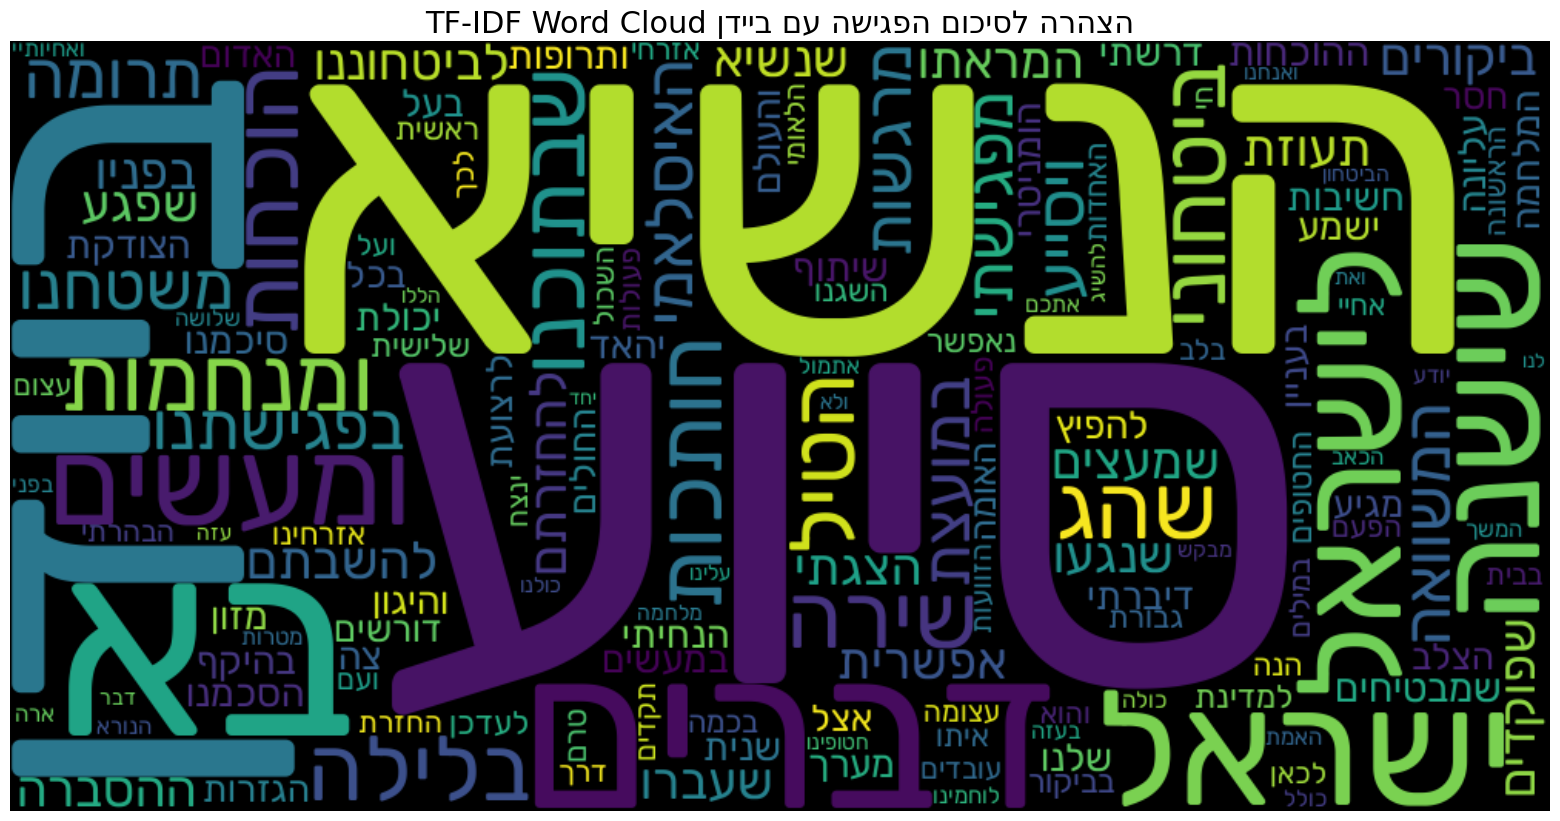

In [114]:
view_doc_tfidf_scores(5)

## in this document we can see its about the finance minister - and thus we see the most bold words are:
### שר, האוצר, לכולם

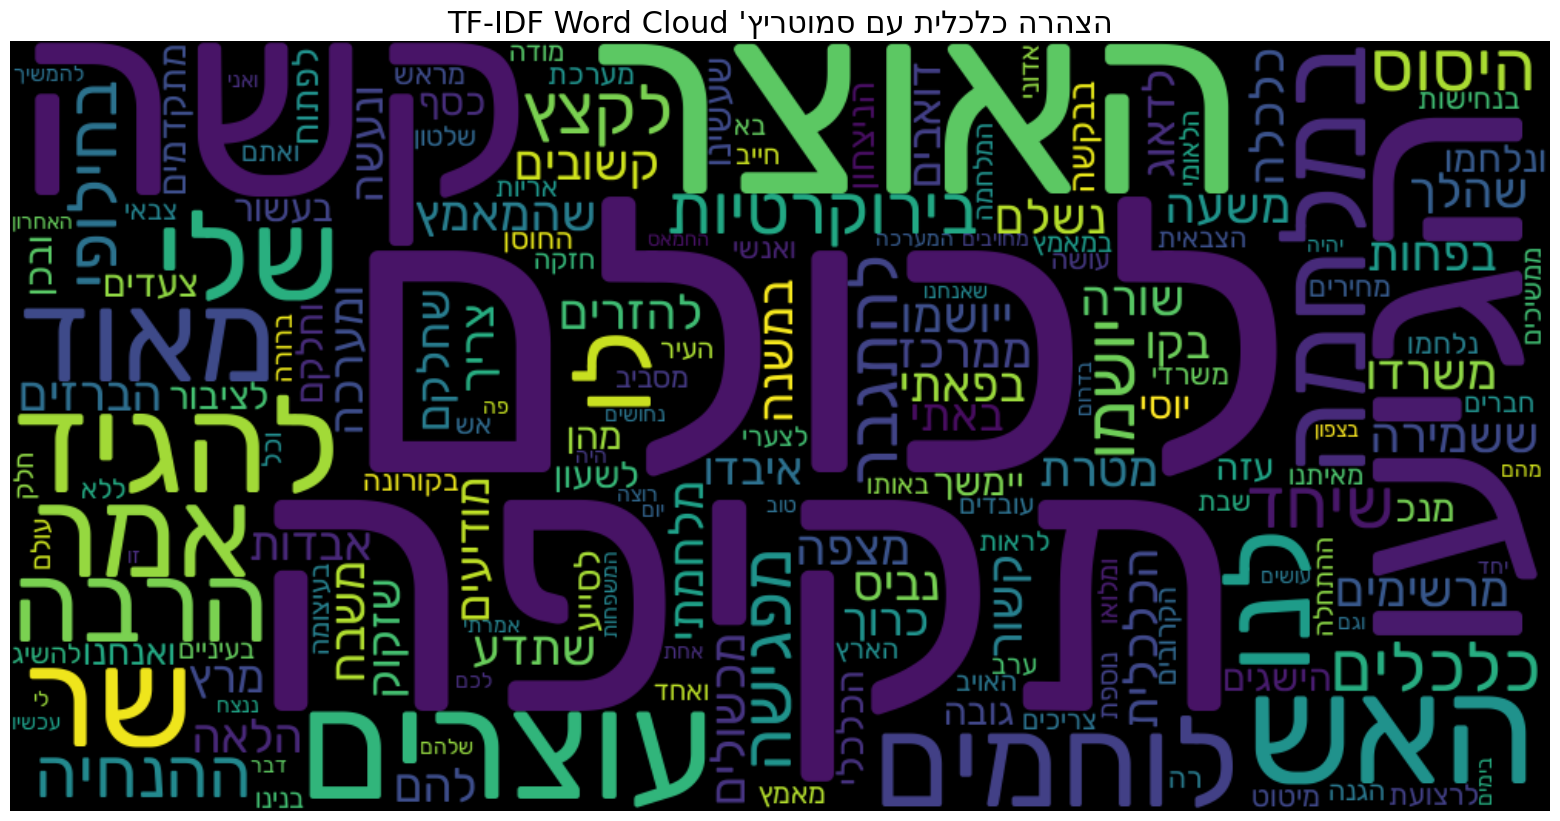

In [115]:
view_doc_tfidf_scores(10)

## in this document we can see its about the finance plan - and thus we see the most bold words are:
### לעזור, מילארדים, שהכסף

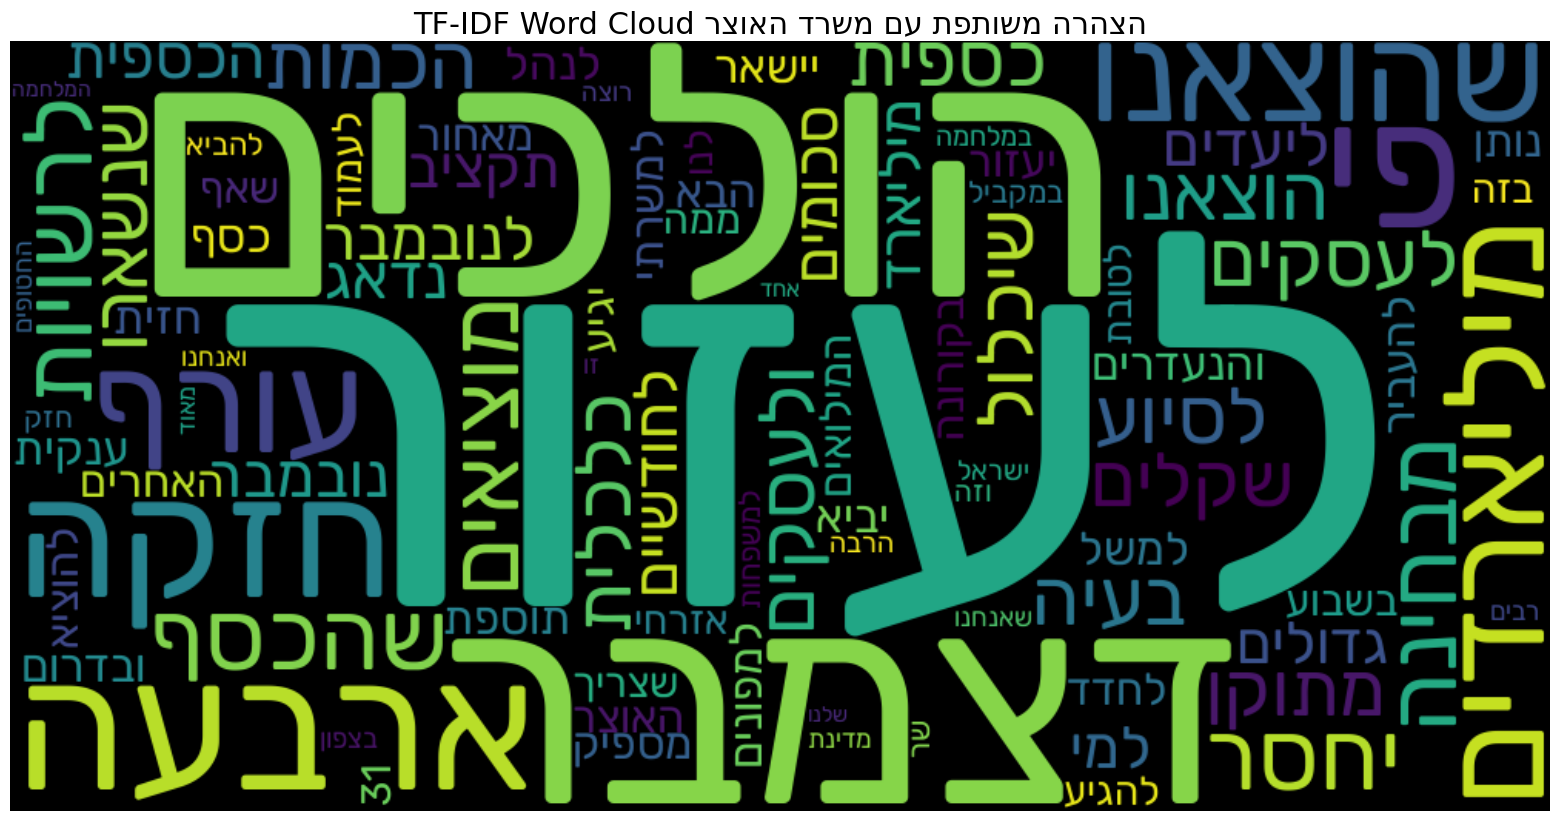

In [116]:
view_doc_tfidf_scores(13)

## Now we will compare between a specific months to the rest of them

In [117]:
def view_month_tfidf_scores(year, month):
    tf_idf_scores = get_tfidf_scores_by_month(filtered_bibi_df, year, month, heb_stopwords)
    plot_wordcloud_from_scores(tf_idf_scores, year=year, month=month, font_path='Rubik-Regular.ttf')

## In May 2024: special memorial days and independence day - and thus a lot of words regarding those have appeared in this month and not in the other ones, like:
### השואה, יהודים, הטרור, האיבה, האור, לכבוד

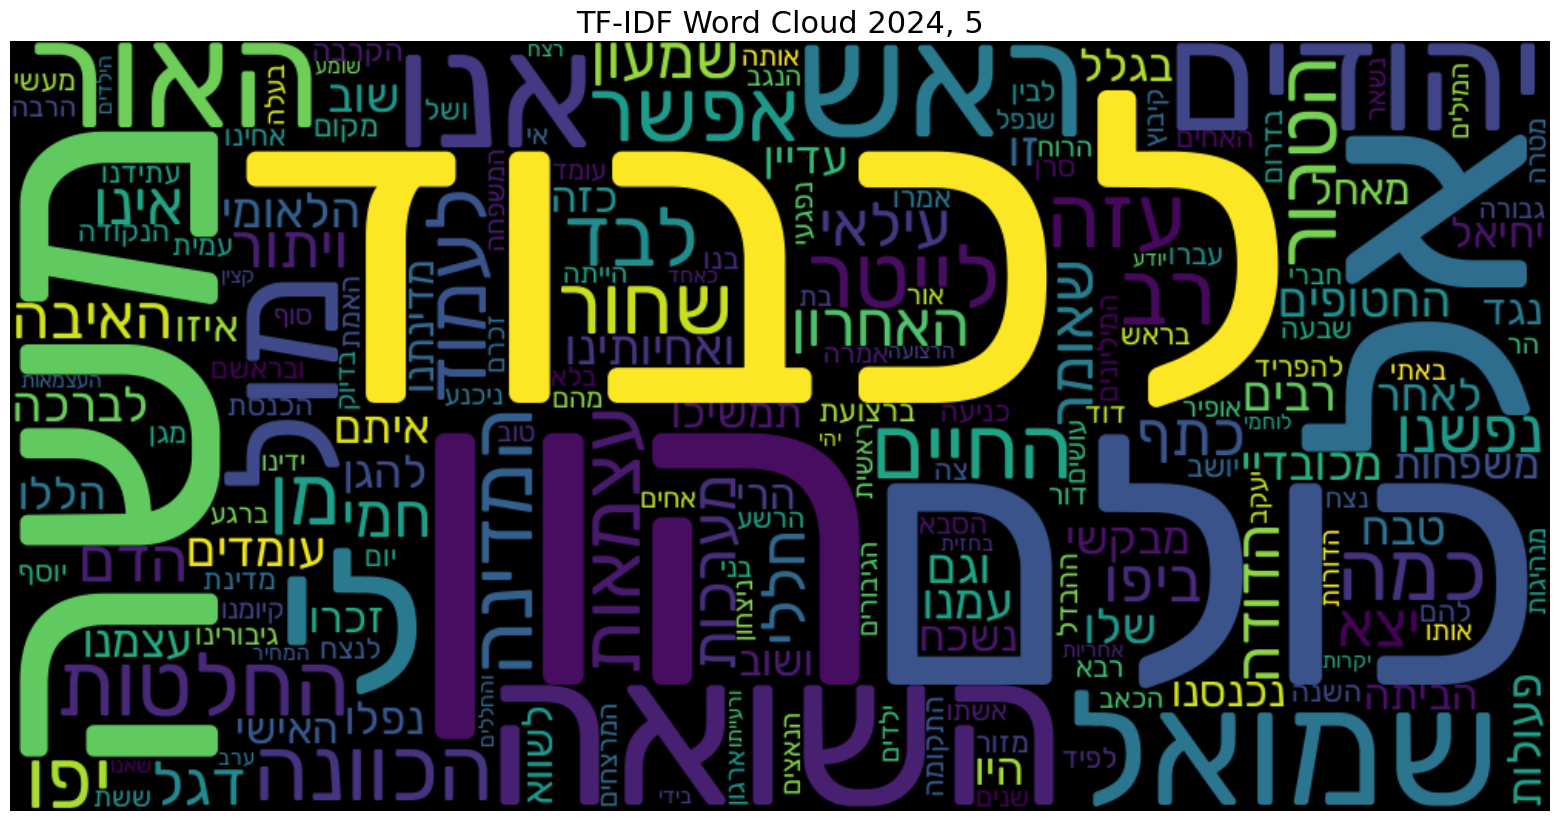

In [118]:
view_month_tfidf_scores(2024, 5)

## In September 2024: a talk about freeing six hostages in a deal has raised, and thus words regarding this deal are bold here than in any other month, words like:
### סרב, לעסקה, משא, ומתן, שישה, חטופינו

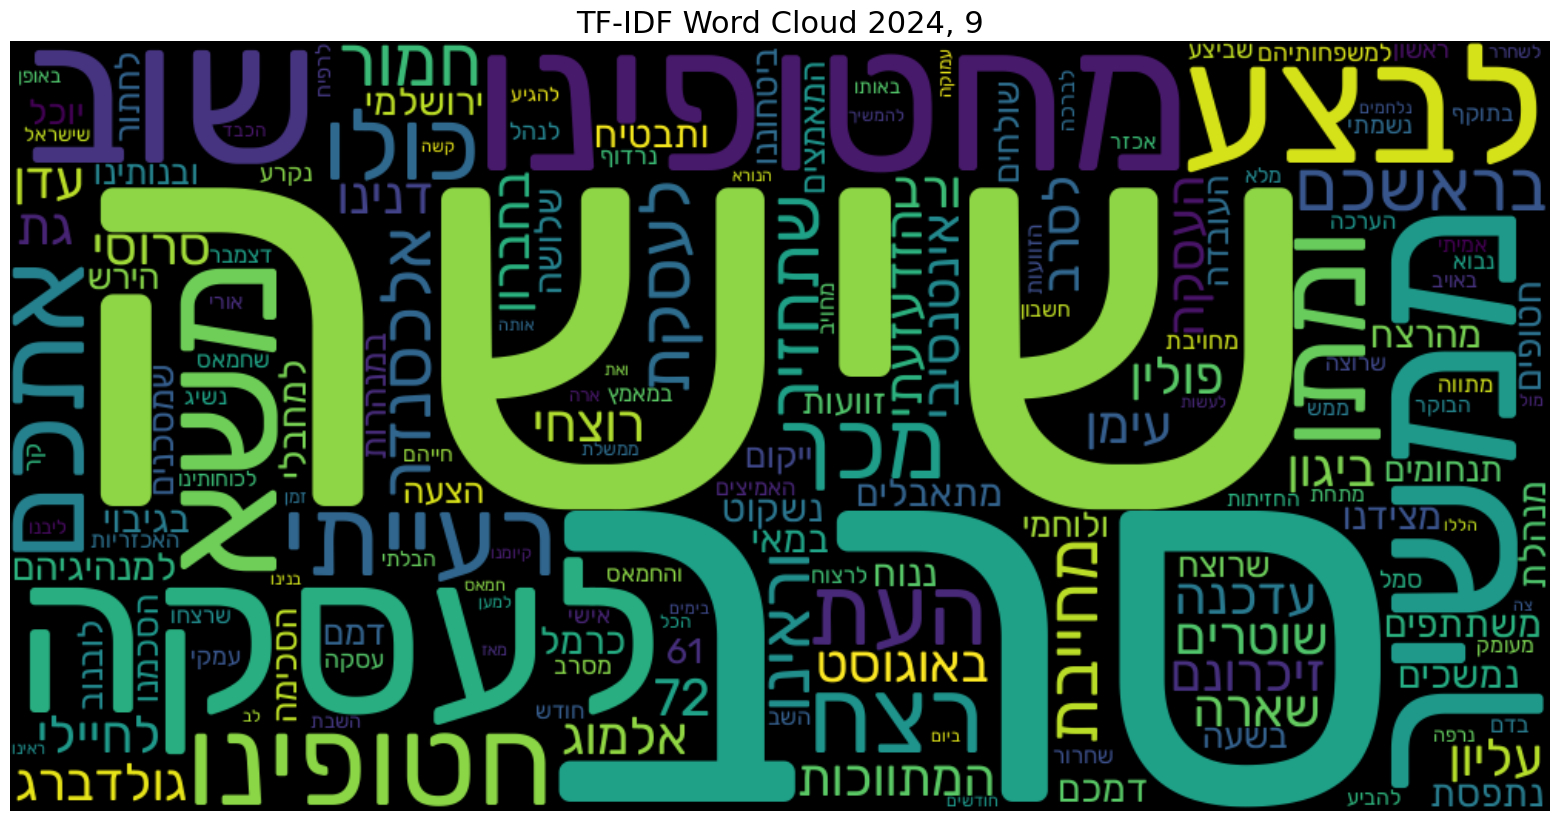

In [119]:
view_month_tfidf_scores(2024, 9)